## Political Blogs Dataset - HW1 - Q3

We will study a political blogs dataset first compiled for the paper Lada A. Adamic and Natalie Glance,
“The political blogosphere and the 2004 US Election”, in Proceedings of the WWW-2005 Workshop on the
Weblogging Ecosystem (2005). It is assumed that blog-site with the same political orientation are more
2
likely to link to each other, thus, forming a “community” or “cluster” in a graph. In this question, we will
see whether or not this hypothesis is likely to be true based on data.
• The dataset nodes.txt contains a graph with n = 1490 vertices (“nodes”) corresponding to political
blogs.
• The dataset edges.txt contains edges between the vertices. You may remove isolated nodes (nodes that
are not connected any other nodes) in the pre-processing.

We will treat the network as an undirected graph; thus, when constructing the adjacency matrix, make
it symmetrical by, e.g., set the entry in the adjacency matrix to be one whether there is an edge between
the two nodes (in either direction).
In addition, each vertex has a 0-1 label (in the 3rd column of the data file) corresponding to the true
political orientation of that blog. We will consider this as the true label and check whether spectral clustering
will cluster nodes with the same political orientation as possible.

In [512]:
## Import packages
import numpy as np
import os
from os.path import abspath, exists
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import scipy
from scipy import sparse
from collections import defaultdict
import pandas as pd

## Load Data + Data Processing

In [447]:
# edges is simple enough can be loaded with np.loadtxt
edges_array = np.loadtxt('edges.txt',dtype='int')

In [448]:
#assign to a for demo code used later
a = edges_array

In [449]:
#open nodes.txt and split to extract true_labels (0,1) and names for clustering
with open('nodes.txt') as fid:
    true_labels = []
    node_names = []
    for line in fid.readlines():
        label = line.split('\t')[2]
        name = line.split('\t')[1]
        true_labels.append(label)
        node_names.append(name)

true_labels = np.array(true_labels).astype(int)

In [450]:
#nodes_array = np.char.split(nodes_array)

In [451]:
#check
#print(true_labels)
#print(node_names)

In [452]:
# #retrieve blog names
# node_names = []
# for i in nodes_array:
#     node_names.append(i[1])

In [453]:
# #retrieve blog labels
# true_labels = []
# for i in nodes_array:
#     true_labels.append(i[2])

In [454]:
# for i in nodes_array:
#     print(i[2])
#     print(i)

## Spectral Graph
 Source - Demo Code - test_football.py

In [455]:
# spectral clustering
n = 1490
k = 13

In [456]:
i = a[:, 0]-1
j = a[:, 1]-1
v = np.ones((a.shape[0], 1)).flatten()

In [457]:
A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
A = (A + np.transpose(A))
A = sparse.csc_matrix.todense(A) # ## convert to dense matrix
rowsum = A.sum(axis=1)
rowsum = np.asarray(rowsum).reshape(-1)
rowsum

array([27., 48.,  0., ...,  1., 22.,  1.])

In [458]:
#find nodes with zero degree
z_index = []
nonz_index = []
for c,i in enumerate(rowsum):
    if i == 0:
        z_index.append(c)
    else:
        nonz_index.append(c)
        
print(z_index)

[2, 3, 24, 47, 48, 49, 53, 56, 59, 60, 62, 70, 73, 90, 93, 107, 110, 111, 119, 121, 125, 130, 133, 134, 138, 145, 147, 152, 160, 163, 168, 173, 175, 182, 194, 195, 196, 198, 205, 213, 220, 225, 227, 230, 231, 233, 235, 239, 241, 246, 250, 253, 257, 259, 260, 262, 264, 265, 269, 270, 284, 285, 293, 301, 303, 305, 318, 319, 321, 323, 329, 333, 335, 338, 341, 342, 345, 347, 358, 365, 368, 371, 374, 375, 385, 394, 397, 411, 412, 422, 424, 429, 432, 434, 446, 454, 455, 456, 457, 458, 462, 463, 472, 475, 477, 481, 484, 485, 509, 519, 521, 525, 527, 528, 530, 532, 544, 545, 551, 556, 557, 564, 568, 570, 575, 580, 581, 585, 591, 592, 593, 598, 605, 606, 607, 610, 626, 628, 629, 632, 635, 637, 638, 655, 657, 662, 664, 671, 672, 677, 691, 694, 696, 697, 705, 706, 709, 718, 722, 723, 727, 732, 733, 741, 745, 747, 749, 750, 751, 752, 758, 768, 769, 782, 784, 788, 794, 831, 843, 844, 852, 865, 866, 876, 901, 904, 905, 916, 922, 923, 927, 947, 956, 968, 975, 984, 985, 996, 998, 1001, 1010, 1011, 101

In [459]:
#remove zero indices from matrix
#remove rows
A_nonzero = A[nonz_index,:]
#remove columns
A_nonzero = A_nonzero[:,nonz_index]

#check this worked
print(A_nonzero.shape)

#remove nonzero from true labels
true_labels = true_labels[nonz_index]

#check this worked
print(true_labels.shape)

assert A_nonzero.shape[0] == A_nonzero.shape[1]

(1224, 1224)
(1224,)


In [460]:
A = A_nonzero
D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
L = D @ A @ D
L = np.array(L) # ## covert to array

#L.shape

In [461]:
# eigendecompoosition
v, x= np.linalg.eig(L)
idx_sorted = np.argsort(v) # the index of eigenvalue sorted acsending

In [462]:
x = x[:, idx_sorted[-k:]] # select the k largest eigenvectors

In [463]:
x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)

In [464]:
kmeans = KMeans(n_clusters = k).fit(x.real)
c_idx = kmeans.labels_

In [465]:
c_idx

array([11, 11,  0, ...,  2,  2,  2])

In [466]:
# show cluster
cluster_results = defaultdict(list)
for i in range(0,k):
    #print(f'Cluster {i+1}\n***************')
    idx = [index for index, t in enumerate(c_idx) if t == i]
    for index in idx:
        #print(idx2name[index])
        cluster_results[i].append(node_names[index])
        #print(i)
#cluster_results

In [467]:
cl_counts = np.unique(c_idx, return_counts=True)
cl_counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([124, 161, 168,  28,  53, 110,  78,  24, 256, 120,  24,  56,  22],
       dtype=int64))

In [468]:
# cluster_n = len(c_idx[c_idx == 0])
# cluster_n

In [469]:
cluster_1 = np.sum(true_labels[c_idx == 0])
print(cluster_1)
cluster_0 = cluster_n-np.sum(true_labels[c_idx == 0])
print(cluster_0)

3
148


In [470]:
len(c_idx)

1224

In [472]:
majority_labels = []
mismatch_rates = []
total_mismatch = 0
total_perc = 0
for i in range(0,k):
    cluster_n = len(c_idx[c_idx == i])
    cluster_1 = np.sum(true_labels[c_idx == i])
    cluster_0 = cluster_n-np.sum(true_labels[c_idx == i])
    if cluster_1 >= cluster_n/2:
        majority_labels.append(1)
        mismatch_rates.append(cluster_0/cluster_n)
    else:
        majority_labels.append(0)
        mismatch_rates.append(cluster_1/cluster_n)
    total_mismatch += mismatch_rates[i]*(cluster_n/len(c_idx))
    total_perc += cluster_n/len(c_idx)
    print(total_mismatch)
    print(total_perc)
        
#print(mismatch_rates)
#print(majority_labels)
#print(total_mismatch)

0.0024509803921568627
0.10130718954248366
0.004901960784313725
0.23284313725490197
0.01388888888888889
0.3700980392156863
0.016339869281045753
0.3929738562091503
0.01797385620915033
0.4362745098039216
0.01797385620915033
0.5261437908496732
0.03431372549019608
0.5898692810457516
0.04166666666666667
0.6094771241830066
0.04656862745098039
0.8186274509803922
0.049836601307189546
0.9166666666666667
0.05065359477124183
0.9362745098039217
0.05228758169934641
0.9820261437908497
0.06127450980392157
1.0


## Define Function for testing multiple k

In [473]:
def spectral_clustering(edges,true_labels,node_names,k):
    A = edges
    D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
    L = D @ A @ D
    L = np.array(L) # ## covert to array
    #L.shape
    
    # eigendecompoosition
    v, x= np.linalg.eig(L) #source demo code
    idx_sorted = np.argsort(v) # source demo code
    
    x = x[:, idx_sorted[-k:]] # source demo code
    
    x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1) #source - demo code
    
    kmeans = KMeans(n_clusters = k).fit(x.real) #source demo code
    c_idx = kmeans.labels_ #source demo code
    
    cluster_results = defaultdict(list)
    for i in range(0,k):
        idx = [index for index, t in enumerate(c_idx) if t == i]
        for index in idx:
            cluster_results[i].append(node_names[index])
    
    majority_labels = []
    mismatch_rates = []
    total_mismatch = 0
    for i in range(0,k):
        cluster_n = len(c_idx[c_idx == i])
        cluster_1 = np.sum(true_labels[c_idx == i])
        cluster_0 = cluster_n-np.sum(true_labels[c_idx == i])
        if cluster_1 >= cluster_n/2:
            majority_labels.append(1)
            mismatch_rates.append(cluster_0/cluster_n)
        else:
            majority_labels.append(0)
            mismatch_rates.append(cluster_1/cluster_n)
        total_mismatch += mismatch_rates[i]*(cluster_n/len(c_idx))
        #print(total_mismatch)
    
    return c_idx, total_mismatch, majority_labels, mismatch_rates, cluster_results

In [524]:
#create empty dict to store loop results
k_mismatches = {}
k_cluster_results = {}
mismatch_dict = {}
major_label_dict = {}
tot_mismatch_list = []

#create list for input k values
k_cluster_runs = [2,5,10,25]

for x in k_cluster_runs:
    cluster_index, tot_mismatch, major_labels, mis_rates, c_results = spectral_clustering(A_nonzero,true_labels,node_names,x)
    k_mismatches[x] = tot_mismatch
    k_cluster_results[x] = c_results
    mismatch_dict[x] = mis_rates
    major_label_dict[x] = major_labels
    tot_mismatch_list.append(tot_mismatch)
    print(f"Completed {x} cluster run")
print("Loop has Finished")

Completed 2 cluster run
Completed 5 cluster run
Completed 10 cluster run
Completed 25 cluster run
Loop has Finished


In [499]:
# view results
k_cluster_results
count = 0
for x in k_cluster_runs:
    print(f"{x} cluster run")
    for key, value in k_cluster_results[2].items():
        if isinstance(value, list):
              count += len(value)

2 cluster run
5 cluster run
10 cluster run
25 cluster run


In [518]:
#reporting
print(mismatch_dict)

{2: [0.4795417348608838, 0.0], 5: [0.023809523809523808, 0.021321961620469083, 0.4342105263157895, 0.3, 0.024691358024691357], 10: [0.02912621359223301, 0.02843601895734597, 0.13043478260869565, 0.4166666666666667, 0.41935483870967744, 0.02197802197802198, 0.03333333333333333, 0.2, 0.019178082191780823, 0.42105263157894735], 25: [0.010869565217391304, 0.03125, 0.02, 0.0, 0.016, 0.32142857142857145, 0.10714285714285714, 0.03773584905660377, 0.03333333333333333, 0.46875, 0.07894736842105263, 0.044444444444444446, 0.05263157894736842, 0.034482758620689655, 0.025974025974025976, 0.027777777777777776, 0.0, 0.23076923076923078, 0.030303030303030304, 0.05555555555555555, 0.0196078431372549, 0.0, 0.25, 0.1643835616438356, 0.22580645161290322]}


In [523]:
#reporting
print(major_label_dict)

{2: [1, 0], 5: [0, 1, 0, 1, 1], 10: [1, 1, 1, 0, 0, 0, 0, 1, 0, 0], 25: [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]}


In [525]:
#reporting
print(tot_mismatch_list)

[0.47875816993464054, 0.05065359477124183, 0.06045751633986927, 0.06209150326797384]


In [440]:
#create empty dict to store loop results
k_mismatches = {}
k_cluster_results = {}

#create list for input k values
k_cluster_runs = [x for x in range(2,150)]

for x in k_cluster_runs:
    cluster_index, tot_mismatch, major_labels, mis_rates, c_results = spectral_clustering(A_nonzero,true_labels,node_names,x)
    k_mismatches[x] = tot_mismatch
    k_cluster_results[x] = c_results
    print(f"Completed {x} iterations")
print("Loop has Finished")

Completed 2 iterations
Completed 3 iterations
Completed 4 iterations
Completed 5 iterations
Completed 6 iterations
Completed 7 iterations
Completed 8 iterations
Completed 9 iterations
Completed 10 iterations
Completed 11 iterations
Completed 12 iterations
Completed 13 iterations
Completed 14 iterations
Completed 15 iterations
Completed 16 iterations
Completed 17 iterations
Completed 18 iterations
Completed 19 iterations
Completed 20 iterations
Completed 21 iterations
Completed 22 iterations
Completed 23 iterations
Completed 24 iterations
Completed 25 iterations
Completed 26 iterations
Completed 27 iterations
Completed 28 iterations
Completed 29 iterations
Completed 30 iterations
Completed 31 iterations
Completed 32 iterations
Completed 33 iterations
Completed 34 iterations
Completed 35 iterations
Completed 36 iterations
Completed 37 iterations
Completed 38 iterations
Completed 39 iterations
Completed 40 iterations
Completed 41 iterations
Completed 42 iterations
Completed 43 iterations


In [441]:
k_cluster_results[100]

defaultdict(list,
            {0: ['"washingtonmonthly.com"',
              '"blindmindseye.com"',
              '"brendonsspiderhole.blogspot.com"',
              '"erickohn.com"',
              '"marylandpolitics.blogspot.com"',
              '"mtvirtus.blogspot.com"',
              '"newsnik.com"',
              '"pardonmyenglish.com"'],
             1: ['"750volts.blogspot.com"',
              '"angryhomo.blogspot.com"',
              '"dashnier.blogspot.com"',
              '"deathpenaltyusa.blogspot.com"',
              '"electablog.com"',
              '"elemming2.blogspot.com"',
              '"fromtheroots.org"',
              '"hugozoom.blogspot.com"',
              '"ibe.blogspot.com"',
              '"lettherebepeace.blogspot.com"',
              '"liberalreview.blogspot.com"',
              '"madamepresident2020.blogspot.com"',
              '"mahablog.com"',
              '"njsoccermom.blogspot.com"',
              '"ospolitics.org"',
              '"pudentilla.blogspot.c

In [ ]:
# #print mismatch rates with cluster
# for i in range(0,k):
#     print(f'Cluster {i+1}\n***************')
#     print(f'Mismatch rate is {np.sum(true_labels[c_idx == i])/len(c_idx[c_idx == i])}')

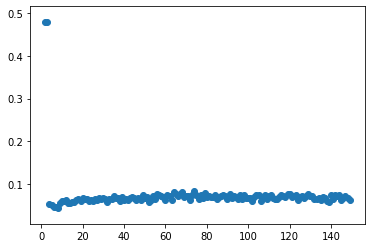

In [444]:
plt.scatter(k_mismatches.keys(),k_mismatches.values())